## SMS Classifier : Multi Nomial Naive Bayes

The notebook is divided into the following sections:
   - Importing and preprocessing data
   - Building the model: Multinomial Naive Bayes
   -  Model building
   -  Model evaluation

### Importing and preprocessing data

In [1]:
import pandas as pd

pd_sms = pd.read_csv('smsspamcollection.csv', header = None, names = ['Class', 'sms'])

pd_sms.head()

,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
len(pd_sms)

smscat_cnt = pd_sms.Class.value_counts()

In [3]:
print ("spam rate is : %0.2f" % round((smscat_cnt[1] / (float) (smscat_cnt[1] + smscat_cnt[0]) * 100),2) )

spam rate is : 13.41


In [4]:
pd_sms['label'] = pd_sms['Class'].map({'ham': 0, 'spam':1})

In [5]:
pd_sms.head()

,Class,sms,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [6]:
pd_sms = pd_sms.drop('Class', axis = 1)
pd_sms.head()

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [7]:
X = pd_sms.sms
y = pd_sms.label

print(X, y)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: sms, Length: 5572, dtype: object 0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: label, Length: 5572, dtype: int64


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [9]:
X_train.head()

710     4mths half price Orange line rental & latest c...
3740                           Did you stitch his trouser
2711    Hope you enjoyed your new content. text stop t...
3155    Not heard from U4 a while. Call 4 rude chat pr...
3748    Ü neva tell me how i noe... I'm not at home in...
Name: sms, dtype: object

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(stop_words='english')

vec.fit(X_train)

CountVectorizer(stop_words='english')

In [11]:
#vec.vocabulary_

In [12]:
len(vec.vocabulary_)

7204

In [13]:
X_train_transformed = vec.transform(X_train)
X_test_transformed = vec.transform(X_test)

#print (X_train_transformed, X_test_transformed)

### Building the model using Bernouli Naive Bayes

In [14]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

In [15]:
bnb.fit(X_train_transformed, y_train)

BernoulliNB()

In [17]:
y_predict_class = bnb.predict(X_test_transformed)

In [18]:
y_predict_proba = bnb.predict_proba(X_test_transformed)

In [20]:
print(bnb)

BernoulliNB()


### Model Evaluation

In [21]:
from sklearn import metrics

metrics.accuracy_score(y_test, y_predict_class)

0.9770279971284996

In [22]:
confusion = metrics.confusion_matrix(y_test, y_predict_class)

print (confusion)

tn = confusion[0, 0]
fp = confusion[0, 1]
fn = confusion[1, 0]
tp = confusion[1, 1]

[[1207    1]
 [  31  154]]


In [23]:
sensitivity = tp / (tp + fn)  ## tn: i.e. the documents which are predicted as ham as same count as actual preidciton of ham
print(sensitivity)

0.8324324324324325


In [24]:
specifictiy = tn / (tn + fp)  ## tp: i.e. the documents which are predicted as spam as same count as actual preidciton of spam
print(specifictiy)

0.9991721854304636


In [25]:
precision = tp / (tp + fp)
print(precision)

0.9935483870967742


In [26]:
print("precision",precision)
print("PRECISION SCORE :",metrics.precision_score(y_test, y_predict_class))
print("RECALL SCORE :", metrics.recall_score(y_test, y_predict_class))
print("F1 SCORE :",metrics.f1_score(y_test, y_predict_class))

precision 0.9935483870967742
PRECISION SCORE : 0.9935483870967742
RECALL SCORE : 0.8324324324324325
F1 SCORE : 0.9058823529411765


## Plotting ROC Curve

In [27]:
import matplotlib.pyplot as plt

In [28]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_proba[:,-1])

In [29]:
metrics.auc(fpr, tpr)

0.9967692858421334

In [30]:
pd.DataFrame({'true_positive_rate' : tpr, 'false_positive_rate' : fpr, 'thresholds': thresholds})

,true_positive_rate,false_positive_rate,thresholds
0,0.000000,0.000000,2.000000e+00
1,0.254054,0.000000,1.000000e+00
2,0.286486,0.000000,1.000000e+00
3,0.297297,0.000000,1.000000e+00
4,0.302703,0.000000,1.000000e+00
...,...,...,...
101,1.000000,0.932119,3.481678e-13
102,1.000000,0.933775,3.468137e-13
103,1.000000,0.935430,3.256825e-13
104,1.000000,0.937086,3.248228e-13


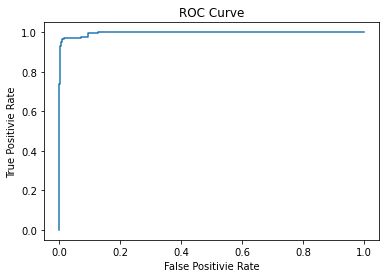

In [31]:
plt.plot(fpr, tpr)
plt.xlabel('False Positivie Rate')
plt.ylabel('True Positivie Rate')
plt.title('ROC Curve')
plt.show()